<a href="https://colab.research.google.com/github/tech-dhawal-03/Data-Mining-Projects/blob/main/Secure_E_Learning_Data_Mining_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn mlxtend kaggle

In [3]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv("StudentsPerformance.csv")

# Display the first few rows
df.head()

# Basic info about data
df.info()

Saving StudentsPerformance.csv to StudentsPerformance.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# Check for null values
print(df.isnull().sum())

# Convert categorical columns into numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Show the updated dataframe
df_encoded.head()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [5]:
# Calculate average score across subjects
df_encoded['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

# Create binary target: 1 if avg score > 70, else 0
df_encoded['high_performer'] = (df_encoded['average_score'] > 70).astype(int)

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [7]:

# Select features (drop output labels and original scores)
X = df_encoded.drop(columns=['math score', 'reading score', 'writing score', 'average_score', 'high_performer'])
y = df_encoded['high_performer']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       112
           1       0.54      0.51      0.53        88

    accuracy                           0.59       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.59      0.59      0.59       200



In [8]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


Student Cluster by score


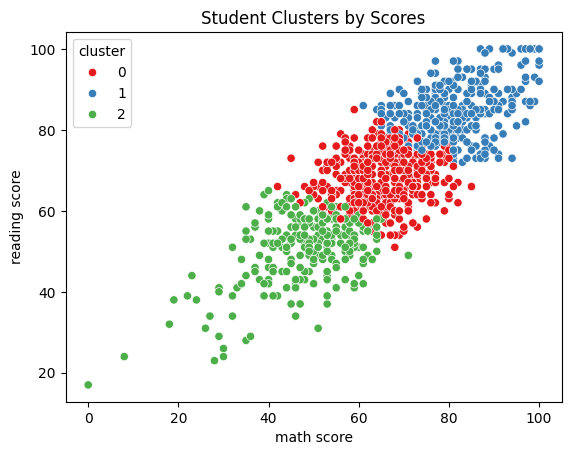

In [9]:
# Cluster based on scores
X_cluster = df[['math score', 'reading score', 'writing score']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

# Visualize Clusters
print("Student Cluster by score")
sns.scatterplot(data=df, x='math score', y='reading score', hue='cluster', palette='Set1')
plt.title("Student Clusters by Scores")
plt.show()


In [10]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [11]:
# Use your preprocessed dataset
X = df_encoded.drop(columns=['math score', 'reading score', 'writing score', 'average_score', 'high_performer'])
y = df_encoded['high_performer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

from sklearn.decomposition import PCA

# Reduce feature space to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Train/test split for reduced data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Re-train SVM on reduced data
svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_train_r, y_train_r)

SVC(C=1)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

SVM Decision Boundary


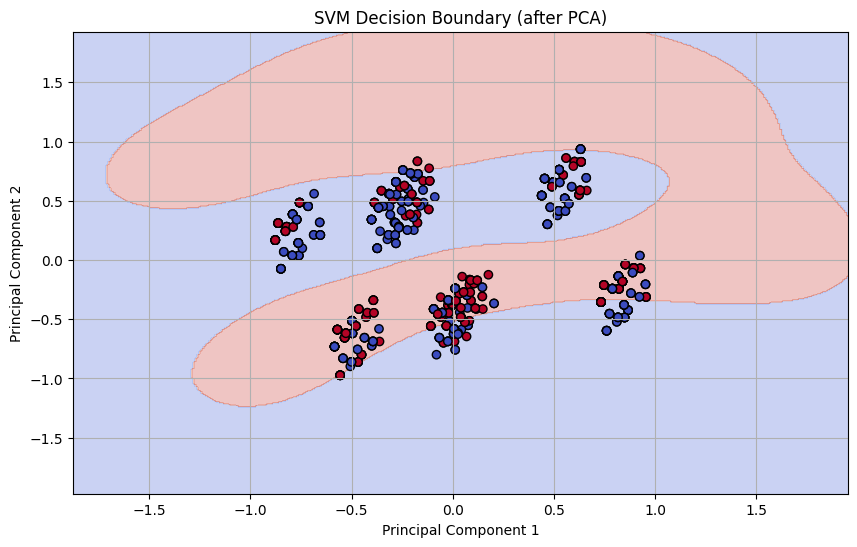

In [13]:
# Create meshgrid for plotting
h = 0.01  # Step size in the mesh
x_min, x_max = X_train_r[:, 0].min() - 1, X_train_r[:, 0].max() + 1
y_min, y_max = X_train_r[:, 1].min() - 1, X_train_r[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
print("SVM Decision Boundary")
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], c=y_train_r, cmap='coolwarm', edgecolors='k')
plt.title("SVM Decision Boundary (after PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()